In [43]:
import sys

sys.path.append("../")

import MetaTrader5 as mt5
import pytz
import numpy as np
import pandas_ta as ta
import pandas as pd
import talib

from datetime import datetime
from terminal.Extensions.Mt5Helper import Mt5Helper
from itertools import compress

In [44]:
mt5.initialize()

True

In [45]:
slippage = 5
days = [23]
data_list = []
for day in days: 
    from_date = datetime(2024, 5, day, tzinfo=pytz.utc)
    to_date = datetime(
        from_date.year, from_date.month, from_date.day, hour=23, tzinfo=pytz.utc
    )
    data_list.append(mt5.copy_ticks_range("WINM24", from_date, to_date, mt5.COPY_TICKS_TRADE))

In [46]:
trainrates = pd.DataFrame()
for data in data_list: 
    trainrates = pd.concat([trainrates, Mt5Helper.OHLC(data, "5s")])
trainrates

trainrates.index = trainrates.index.tz_localize(None)

In [47]:
candle_names = talib.get_function_groups()['Pattern Recognition']
removed = ['CDLCOUNTERATTACK', 'CDLLONGLINE', 'CDLSHORTLINE', 
           'CDLSTALLEDPATTERN', 'CDLKICKINGBYLENGTH']
candle_names = [name for name in candle_names if name not in removed]
candle_names

['CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CDLPIERCING',
 'CDLRICKSHAWMAN',
 'CDLRISEFALL3METHODS',
 'CDLSEPARATINGLINES',
 'CDLSHOOTINGSTAR',
 'CDLSPINNINGTOP',
 'CDLSTICKSANDWICH',
 'CDLTAKURI',
 'CDLTASUKIGAP',
 'CDLTHRUSTING',
 'CDLTRISTAR',
 'CDLUNIQUE3RIVE

In [48]:
candle_rankings = {
        "CDL3LINESTRIKE_Bull": 1,
        "CDL3LINESTRIKE_Bear": 2,
        "CDL3BLACKCROWS_Bull": 3,
        "CDL3BLACKCROWS_Bear": 3,
        "CDLEVENINGSTAR_Bull": 4,
        "CDLEVENINGSTAR_Bear": 4,
        "CDLTASUKIGAP_Bull": 5,
        "CDLTASUKIGAP_Bear": 5,
        "CDLINVERTEDHAMMER_Bull": 6,
        "CDLINVERTEDHAMMER_Bear": 6,
        "CDLMATCHINGLOW_Bull": 7,
        "CDLMATCHINGLOW_Bear": 7,
        "CDLABANDONEDBABY_Bull": 8,
        "CDLABANDONEDBABY_Bear": 8,
        "CDLBREAKAWAY_Bull": 10,
        "CDLBREAKAWAY_Bear": 10,
        "CDLMORNINGSTAR_Bull": 12,
        "CDLMORNINGSTAR_Bear": 12,
        "CDLPIERCING_Bull": 13,
        "CDLPIERCING_Bear": 13,
        "CDLSTICKSANDWICH_Bull": 14,
        "CDLSTICKSANDWICH_Bear": 14,
        "CDLTHRUSTING_Bull": 15,
        "CDLTHRUSTING_Bear": 15,
        "CDLINNECK_Bull": 17,
        "CDLINNECK_Bear": 17,
        "CDL3INSIDE_Bull": 20,
        "CDL3INSIDE_Bear": 56,
        "CDLHOMINGPIGEON_Bull": 21,
        "CDLHOMINGPIGEON_Bear": 21,
        "CDLDARKCLOUDCOVER_Bull": 22,
        "CDLDARKCLOUDCOVER_Bear": 22,
        "CDLIDENTICAL3CROWS_Bull": 24,
        "CDLIDENTICAL3CROWS_Bear": 24,
        "CDLMORNINGDOJISTAR_Bull": 25,
        "CDLMORNINGDOJISTAR_Bear": 25,
        "CDLXSIDEGAP3METHODS_Bull": 27,
        "CDLXSIDEGAP3METHODS_Bear": 26,
        "CDLTRISTAR_Bull": 28,
        "CDLTRISTAR_Bear": 76,
        "CDLGAPSIDESIDEWHITE_Bull": 46,
        "CDLGAPSIDESIDEWHITE_Bear": 29,
        "CDLEVENINGDOJISTAR_Bull": 30,
        "CDLEVENINGDOJISTAR_Bear": 30,
        "CDL3WHITESOLDIERS_Bull": 32,
        "CDL3WHITESOLDIERS_Bear": 32,
        "CDLONNECK_Bull": 33,
        "CDLONNECK_Bear": 33,
        "CDL3OUTSIDE_Bull": 34,
        "CDL3OUTSIDE_Bear": 39,
        "CDLRICKSHAWMAN_Bull": 35,
        "CDLRICKSHAWMAN_Bear": 35,
        "CDLSEPARATINGLINES_Bull": 36,
        "CDLSEPARATINGLINES_Bear": 40,
        "CDLLONGLEGGEDDOJI_Bull": 37,
        "CDLLONGLEGGEDDOJI_Bear": 37,
        "CDLHARAMI_Bull": 38,
        "CDLHARAMI_Bear": 72,
        "CDLLADDERBOTTOM_Bull": 41,
        "CDLLADDERBOTTOM_Bear": 41,
        "CDLCLOSINGMARUBOZU_Bull": 70,
        "CDLCLOSINGMARUBOZU_Bear": 43,
        "CDLTAKURI_Bull": 47,
        "CDLTAKURI_Bear": 47,
        "CDLDOJISTAR_Bull": 49,
        "CDLDOJISTAR_Bear": 51,
        "CDLHARAMICROSS_Bull": 50,
        "CDLHARAMICROSS_Bear": 80,
        "CDLADVANCEBLOCK_Bull": 54,
        "CDLADVANCEBLOCK_Bear": 54,
        "CDLSHOOTINGSTAR_Bull": 55,
        "CDLSHOOTINGSTAR_Bear": 55,
        "CDLMARUBOZU_Bull": 71,
        "CDLMARUBOZU_Bear": 57,
        "CDLUNIQUE3RIVER_Bull": 60,
        "CDLUNIQUE3RIVER_Bear": 60,
        "CDL2CROWS_Bull": 61,
        "CDL2CROWS_Bear": 61,
        "CDLBELTHOLD_Bull": 62,
        "CDLBELTHOLD_Bear": 63,
        "CDLHAMMER_Bull": 65,
        "CDLHAMMER_Bear": 65,
        "CDLHIGHWAVE_Bull": 67,
        "CDLHIGHWAVE_Bear": 67,
        "CDLSPINNINGTOP_Bull": 69,
        "CDLSPINNINGTOP_Bear": 73,
        "CDLUPSIDEGAP2CROWS_Bull": 74,
        "CDLUPSIDEGAP2CROWS_Bear": 74,
        "CDLGRAVESTONEDOJI_Bull": 77,
        "CDLGRAVESTONEDOJI_Bear": 77,
        "CDLHIKKAKEMOD_Bull": 82,
        "CDLHIKKAKEMOD_Bear": 81,
        "CDLHIKKAKE_Bull": 85,
        "CDLHIKKAKE_Bear": 83,
        "CDLENGULFING_Bull": 84,
        "CDLENGULFING_Bear": 91,
        "CDLMATHOLD_Bull": 86,
        "CDLMATHOLD_Bear": 86,
        "CDLHANGINGMAN_Bull": 87,
        "CDLHANGINGMAN_Bear": 87,
        "CDLRISEFALL3METHODS_Bull": 94,
        "CDLRISEFALL3METHODS_Bear": 89,
        "CDLKICKING_Bull": 96,
        "CDLKICKING_Bear": 102,
        "CDLDRAGONFLYDOJI_Bull": 98,
        "CDLDRAGONFLYDOJI_Bear": 98,
        "CDLCONCEALBABYSWALL_Bull": 101,
        "CDLCONCEALBABYSWALL_Bear": 101,
        "CDL3STARSINSOUTH_Bull": 103,
        "CDL3STARSINSOUTH_Bear": 103,
        "CDLDOJI_Bull": 104,
        "CDLDOJI_Bear": 104
    }

In [49]:
op = trainrates['open']
hi = trainrates['high']
lo = trainrates['low']
cl = trainrates['close']

# create columns for each pattern
for candle in candle_names:
    # below is same as;
    # df["CDL3LINESTRIKE"] = talib.CDL3LINESTRIKE(op, hi, lo, cl)
    trainrates[candle] = getattr(talib, candle)(op, hi, lo, cl)
    
trainrates

,open,high,low,close,tick_volume,real_volume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,...,CDLSHOOTINGSTAR,CDLSPINNINGTOP,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
time_msc,,,,,,,,,,,,,,,,,,,,,
2024-05-23 09:00:50,126150.0,126225.0,126090.0,126090.0,8382,32354,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-05-23 09:00:55,126095.0,126160.0,126050.0,126160.0,6823,19980,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-05-23 09:01:00,126160.0,126235.0,126150.0,126180.0,10179,32004,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-05-23 09:01:05,126175.0,126275.0,126170.0,126265.0,6512,20084,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-05-23 09:01:10,126270.0,126285.0,126245.0,126265.0,4327,12481,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23 18:31:00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-05-23 18:31:05,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2024-05-23 18:31:10,NaN,NaN,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
trainrates['candlestick_pattern'] = np.nan
trainrates['candlestick_match_count'] = np.nan

for index, row in trainrates.iterrows():

    # no pattern found
    if len(row[candle_names]) - sum(row[candle_names] == 0) == 0:
        trainrates.loc[index,'candlestick_pattern'] = "NO_PATTERN"
        trainrates.loc[index, 'candlestick_match_count'] = 0
    # single pattern found
    elif len(row[candle_names]) - sum(row[candle_names] == 0) == 1:
        # bull pattern 100 or 200
        if any(row[candle_names].values > 0):
            pattern = list(compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bull'
            trainrates.loc[index, 'candlestick_pattern'] = pattern
            trainrates.loc[index, 'candlestick_match_count'] = 1
        # bear pattern -100 or -200
        else:
            pattern = list(compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bear'
            trainrates.loc[index, 'candlestick_pattern'] = pattern
            trainrates.loc[index, 'candlestick_match_count'] = 1
    # multiple patterns matched -- select best performance
    else:
        # filter out pattern names from bool list of values
        patterns = list(compress(row[candle_names].keys(), row[candle_names].values != 0))
        container = []
        for pattern in patterns:
            if row[pattern] > 0:
                container.append(pattern + '_Bull')
            else:
                container.append(pattern + '_Bear')
        rank_list = [candle_rankings[p] for p in container]
        if len(rank_list) == len(container):
            rank_index_best = rank_list.index(min(rank_list))
            trainrates.loc[index, 'candlestick_pattern'] = container[rank_index_best]
            trainrates.loc[index, 'candlestick_match_count'] = len(container)
            
# clean up candle columns
try:
    trainrates.drop(candle_names, axis = 1, inplace = True)
except:
    pass

trainrates.loc[trainrates.candlestick_pattern == 'NO_PATTERN', 'candlestick_pattern'] = ''
trainrates.candlestick_pattern = trainrates.candlestick_pattern.apply(lambda x: x[3:])

In [51]:
def plot_rates(df, length):
    df.iloc[0:length][
        [
            "open",
        ]
    ].plot(
        subplots=[("open",)],
        figsize=(50, 20),
    )
    
trainrates

,open,high,low,close,tick_volume,real_volume,candlestick_pattern,candlestick_match_count
time_msc,,,,,,,,
2024-05-23 09:00:50,126150.0,126225.0,126090.0,126090.0,8382,32354,,0.0
2024-05-23 09:00:55,126095.0,126160.0,126050.0,126160.0,6823,19980,,0.0
2024-05-23 09:01:00,126160.0,126235.0,126150.0,126180.0,10179,32004,,0.0
2024-05-23 09:01:05,126175.0,126275.0,126170.0,126265.0,6512,20084,,0.0
2024-05-23 09:01:10,126270.0,126285.0,126245.0,126265.0,4327,12481,,0.0
...,...,...,...,...,...,...,...,...
2024-05-23 18:31:00,NaN,NaN,NaN,NaN,0,0,,0.0
2024-05-23 18:31:05,NaN,NaN,NaN,NaN,0,0,,0.0
2024-05-23 18:31:10,NaN,NaN,NaN,NaN,0,0,,0.0


In [52]:
#trainrates.to_excel("all_data.xlsx")

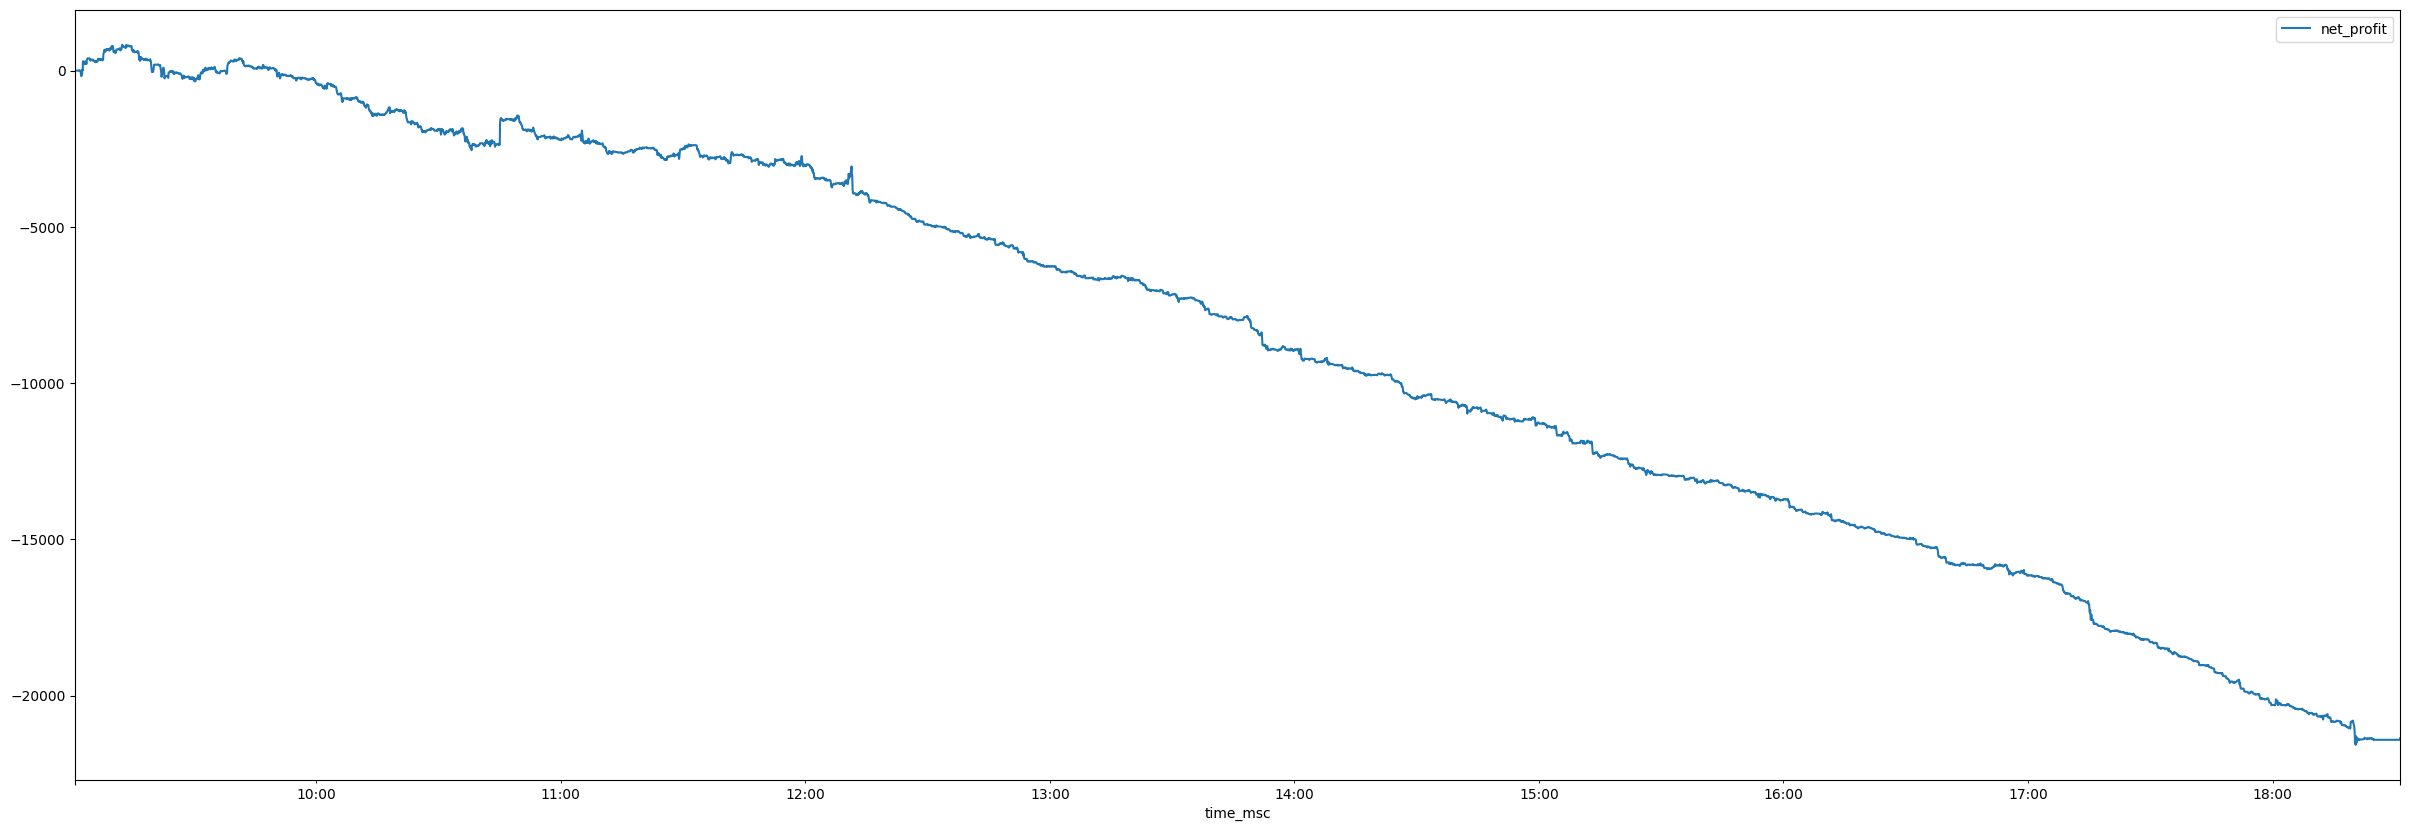

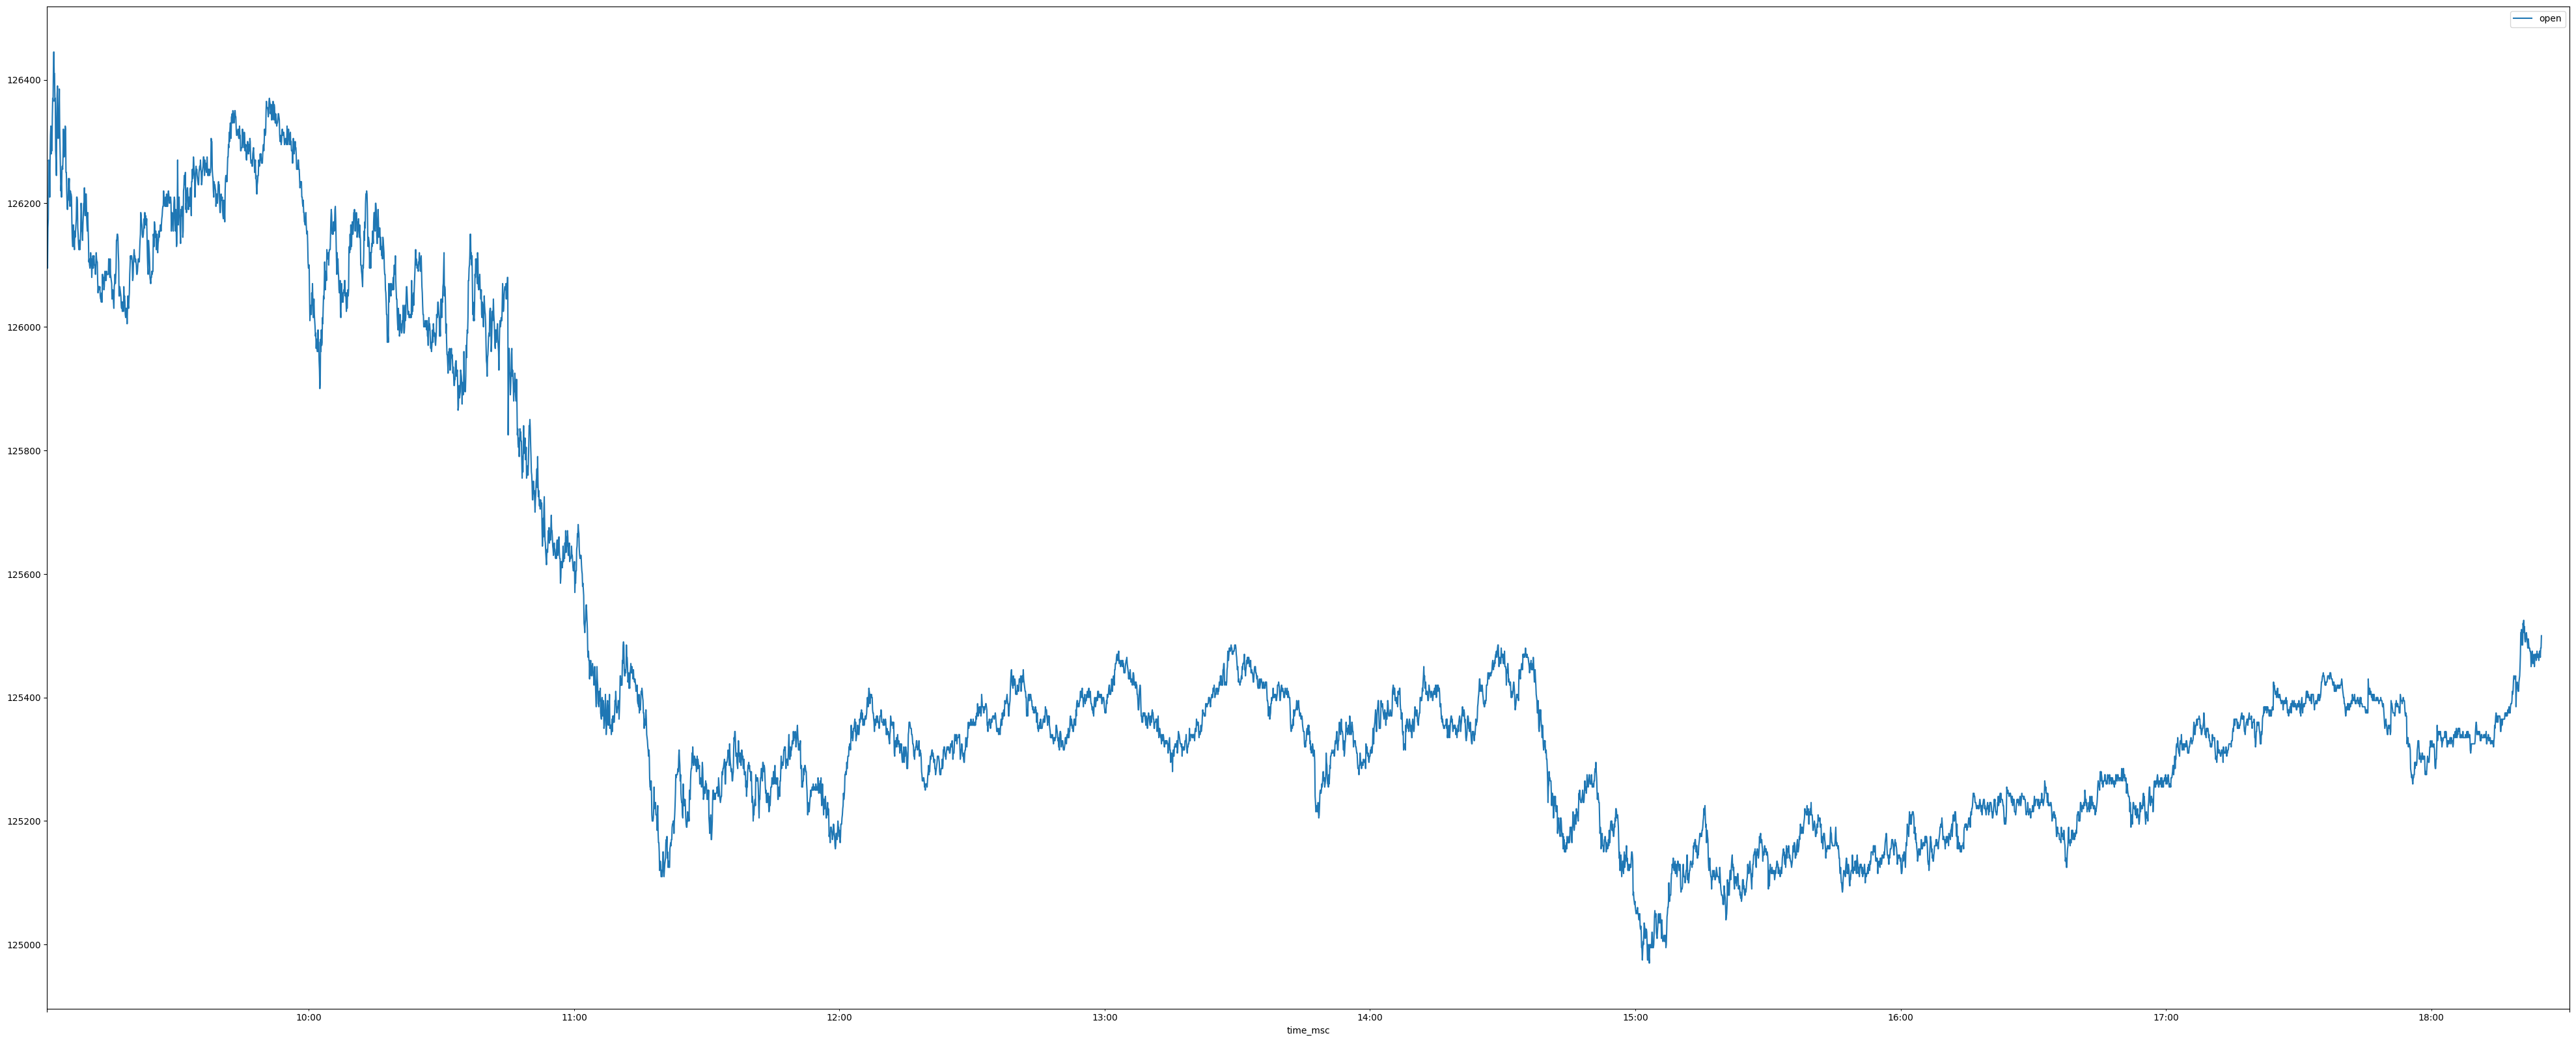

In [56]:
sum_buy = 0
buy_qty = 0
buy_avg = 0
buy_profit = 0

sum_sell = 0
sell_qty = 0
sell_avg = 0
sell_profit = 0

net_qty = 0
net_profit = 0

used_slippage = 0
 
def update(i):
    trainrates.loc[i, "sum_buy"] = sum_buy
    trainrates.loc[i, "buy_qty"] = buy_qty
    trainrates.loc[i, "buy_avg"] = buy_avg
    trainrates.loc[i, "buy_profit"] = buy_profit
    trainrates.loc[i, "sum_sell"] = sum_sell
    trainrates.loc[i, "sell_qty"] = sell_qty
    trainrates.loc[i, "sell_avg"] = sell_avg
    trainrates.loc[i, "sell_profit"] = sell_profit
    trainrates.loc[i, "net_qty"] = net_qty
    trainrates.loc[i, "net_profit"] = net_profit
    trainrates.loc[i, "slippage"] = used_slippage


prev = None
for i, item in trainrates.iterrows():
    if np.isnan(item.open):
        update(i)
        continue

    if prev is None: 
        prev = item
        continue
    
    used_slippage = slippage

    if prev["candlestick_pattern"].find("_Bear") != -1:
        qty = 1

        if net_qty < -2:
            qty = abs(net_qty) + 1

        sum_buy += qty * (item.open + used_slippage)
        buy_qty += qty

    if prev["candlestick_pattern"].find("_Bull") != -1:
        qty = 1

        if net_qty > 2:
            qty = abs(net_qty) + 1

        sum_sell += qty * (item.open - used_slippage)
        sell_qty += qty

    buy_avg = 0 if sum_buy == 0 else sum_buy / buy_qty
    sell_avg = 0 if sum_sell == 0 else sum_sell / sell_qty

    buy_profit = 0 if buy_qty == 0 else (item.open - used_slippage - buy_avg) * buy_qty
    sell_profit = (
        0 if sell_qty == 0 else (sell_avg - item.open + used_slippage) * sell_qty
    )

    net_qty = buy_qty - sell_qty
    net_profit = buy_profit + sell_profit

    update(i)
    
    prev = item


trainrates.iloc[:][["net_profit"]].plot(figsize=(30, 10))

plot_rates(trainrates, None)

In [54]:
trainrates.to_excel("output.xlsx")